--------------

# **Libraries:**

In [1]:
# Pandas & Numpy
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

#General Ops
from operator import truediv

# Maths
from scipy import stats
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocess and Evaluation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# OS
import os

# Warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# **Importing Dataset:**

In [2]:
# Input the Dataset

# os.chdir('/data/')

root = os.getcwd()
filepath = 'data/'

In [3]:
#column_header_list = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FLIGHT_DATE', 'REPORTING_AIRLINE', 'ID_REPORTING_AIRLINE', 'CARRIER_REPORTING_AIRLINE', 'TAIL_NUMBER', 'FLIGHT_NUMBER_REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NAME', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE', 'DEST_STATE_FIPS', 'DEST_STATE_NAME', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_MINUTES', 'DEP_DEL_15', 'DEPARTURE_DELAY_GROUPS', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_MINUTES', 'ARR_DEL_15', 'ARRIVAL_DELAY_GROUPS', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_G_TIME', 'LONGEST_ADD_G_TIME', 'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ACTUAL_ELAPSED_TIME', 'DIV_ARR_DELAY', 'DIV_DISTANCE']

#data = pd.DataFrame()
#for fname in ['jan_22.csv', 'feb_22.csv','mar_22.csv', 'apr_22.csv','may_22.csv', 'jun_22.csv','jul_22.csv', 'aug_22.csv','sep_22.csv', 'oct_22.csv','nov_22.csv', 'dec_22.csv', 'jan_23.csv', 'feb_23.csv','mar_23.csv', 'apr_23.csv','may_23.csv', 'jun_23.csv','jul_23.csv', 'aug_23.csv','sep_23.csv']:
#  print("Reading", fname)
#  f = pd.read_csv(root + "/" + filepath + fname, usecols = np.arange(0,69))
#  f.columns = column_header_list
#  data = pd.concat([data, f], ignore_index=True)
#del(f)

#data.to_csv('airline_flight_data.csv', encoding='utf-8')

### Fetching out the Dataset

In [4]:
df = pd.read_csv('airline_flight_data.csv', index_col=0)


C:\Users\sanyu\AppData\Local\Temp\ipykernel_23116\206829032.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airline_flight_data.csv', index_col=0)


In [5]:
data = pd.DataFrame()

data = df.copy()

In [6]:
df_testing = df[df['REPORTING_AIRLINE'] == 'WN'].head(1000)
df_testing.to_csv('airline_flight_data_testing.csv', encoding='utf-8')

In [7]:
print(df.shape)
display(df.head(10))

(11843885, 69)


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK FLIGHT_DATE  \
0  2022        1      1            14            5  2022-01-14   
1  2022        1      1            15            6  2022-01-15   
2  2022        1      1            16            7  2022-01-16   
3  2022        1      1            17            1  2022-01-17   
4  2022        1      1            18            2  2022-01-18   
5  2022        1      1            19            3  2022-01-19   
6  2022        1      1            20            4  2022-01-20   
7  2022        1      1            21            5  2022-01-21   
8  2022        1      1            22            6  2022-01-22   
9  2022        1      1            23            7  2022-01-23   

  REPORTING_AIRLINE  ID_REPORTING_AIRLINE CARRIER_REPORTING_AIRLINE  \
0                YX                 20452                        YX   
1                YX                 20452                        YX   
2                YX                 20452                        YX   
3                YX                 20452                        YX   
4                YX                 20452                        YX   
5                YX                 20452                        YX   
6                YX                 20452                        YX   
7                YX                 20452                        YX   
8                YX                 20452                        YX   
9                YX                 20452                        YX   

  TAIL_NUMBER  ...  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  \
0      N119HQ  ...             NaN                  NaN             NaN   
1      N122HQ  ...             NaN                  NaN             NaN   
2      N412YX  ...             NaN                  NaN             NaN   
3      N405YX  ...             NaN                  NaN             NaN   
4      N420YX  ...             NaN                  NaN             NaN   
5      N446YX  ...             NaN                  NaN             NaN   
6      N116HQ  ...             NaN                  NaN             NaN   
7      N419YX  ...             0.0                  0.0             NaN   
8      N137HQ  ...             NaN                  NaN             NaN   
9      N110HQ  ...             NaN                  NaN             NaN   

   TOTAL_ADD_G_TIME LONGEST_ADD_G_TIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST  \
0               NaN                NaN                  0.0              NaN   
1               NaN                NaN                  0.0              NaN   
2               NaN                NaN                  0.0              NaN   
3               NaN                NaN                  0.0              NaN   
4               NaN                NaN                  0.0              NaN   
5               NaN                NaN                  0.0              NaN   
6               NaN                NaN                  0.0              NaN   
7               NaN                NaN                  0.0              NaN   
8               NaN                NaN                  0.0              NaN   
9               NaN                NaN                  0.0              NaN   

   DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY  DIV_DISTANCE  
0                      NaN           NaN           NaN  
1                      NaN           NaN           NaN  
2                      NaN           NaN           NaN  
3                      NaN           NaN           NaN  
4                      NaN           NaN           NaN  
5                      NaN           NaN           NaN  
6                      NaN           NaN           NaN  
7                      NaN           NaN           NaN  
8                      NaN           NaN           NaN  
9                      NaN           NaN           NaN  

[10 rows x 69 columns]

In [8]:
print(df.isna().sum())
perc_val_missing = (df.isna().sum() / df.shape[0]) * 100
print(perc_val_missing.sort_values(ascending=False))

YEAR                              0
QUARTER                           0
MONTH                             0
DAY_OF_MONTH                      0
DAY_OF_WEEK                       0
                             ...   
DIV_AIRPORT_LANDINGS              3
DIV_REACHED_DEST           11814020
DIV_ACTUAL_ELAPSED_TIME    11817033
DIV_ARR_DELAY              11817032
DIV_DISTANCE               11814020
Length: 69, dtype: int64
DIV_ACTUAL_ELAPSED_TIME    99.773284
DIV_ARR_DELAY              99.773275
DIV_DISTANCE               99.747845
DIV_REACHED_DEST           99.747845
LONGEST_ADD_G_TIME         99.367007
                             ...    
ORIGIN_STATE_NAME           0.000000
ORIGIN_STATE_FIPS           0.000000
ORIGIN_STATE                0.000000
ARR_TIME_BLK                0.000000
YEAR                        0.000000
Length: 69, dtype: float64


In [9]:
print(df.dtypes)

YEAR                         int64
QUARTER                      int64
MONTH                        int64
DAY_OF_MONTH                 int64
DAY_OF_WEEK                  int64
                            ...   
DIV_AIRPORT_LANDINGS       float64
DIV_REACHED_DEST           float64
DIV_ACTUAL_ELAPSED_TIME    float64
DIV_ARR_DELAY              float64
DIV_DISTANCE               float64
Length: 69, dtype: object


In [10]:
df["Weekend"] = np.where(df["DAY_OF_WEEK"].isin([6, 7]), 1, 0)
df["Weekday"] = np.where(df["DAY_OF_WEEK"].isin([1, 2, 3, 4, 5]), 1, 0)
df["FlightDuration"] = (pd.to_datetime(df["ARR_TIME"]) - pd.to_datetime(df["DEP_TIME"])) / np.timedelta64(1, 'm')
df["diff_btw_dept_time"] = df["DEP_TIME"] - df["CRS_DEP_TIME"]
df.Weekend.unique()

array([0, 1])

In [11]:
# finding outliers
z_scores = abs(np.subtract(df["DEP_DELAY"], df["DEP_DELAY"].mean()) / df["DEP_DELAY"].std())
outliers = z_scores[z_scores > 3].index
print(f"Potential outliers: {df.loc[outliers, 'FLIGHT_DATE']}")

Potential outliers: 45          2022-01-31
77          2022-01-02
79          2022-01-02
349         2022-01-17
596         2022-01-21
               ...    
11842389    2023-09-07
11842406    2023-09-07
11842480    2023-09-07
11842721    2023-09-06
11843183    2023-09-04
Name: FLIGHT_DATE, Length: 160654, dtype: object


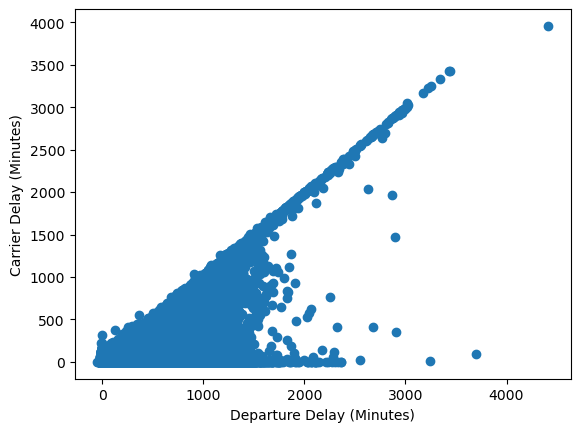

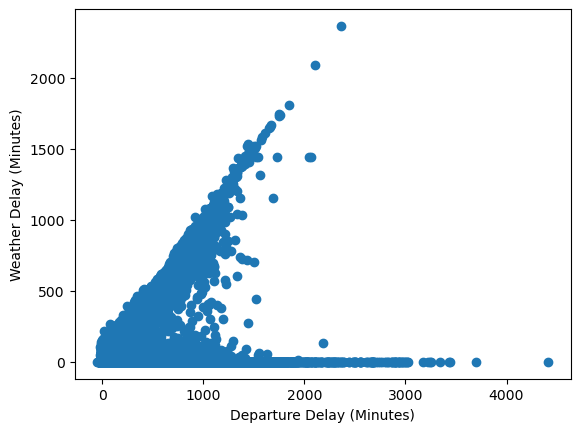

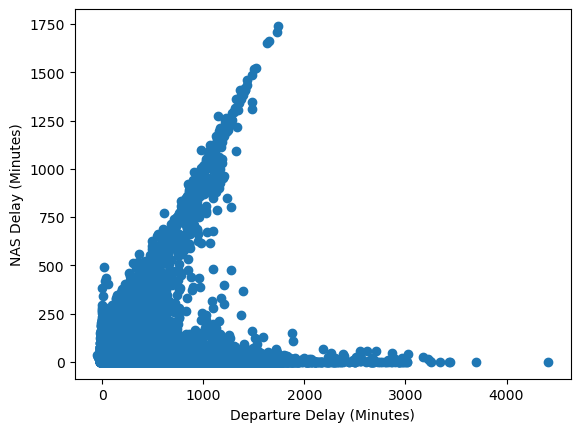

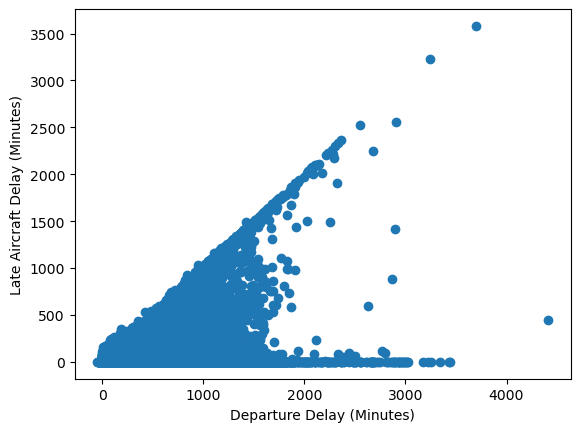

In [12]:
plt.scatter(df["DEP_DELAY"], df["SECURITY_DELAY"])
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Security Delay (Minutes)")
plt.show()

plt.scatter(df["DEP_DELAY"], df["CARRIER_DELAY"])
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Carrier Delay (Minutes)")
plt.show()

plt.scatter(df["DEP_DELAY"], df["WEATHER_DELAY"])
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Weather Delay (Minutes)")
plt.show()

plt.scatter(df["DEP_DELAY"], df["NAS_DELAY"])
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("NAS Delay (Minutes)")
plt.show()

plt.scatter(df["DEP_DELAY"], df["LATE_AIRCRAFT_DELAY"])
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Late Aircraft Delay (Minutes)")
plt.show()

In [13]:
# Getting the name of airlines based on their codes assigned by the Department of Transportation: https://www.bts.gov/topics/airlines-and-airports/airline-codes
codes_filepath = '/data/AIRLINE_ID.csv'
airline_code_mapping = pd.read_csv(root+codes_filepath, encoding='windows-1252', index_col = False)
airline_code_mapping.astype(str).head()

Code                                            Airline
0  02Q                                      Titan Airways
1  04Q                                 Tradewind Aviation
2  06Q                      Master Top Linhas Aereas Ltd.
3  07Q                                Flair Airlines Ltd.
4  09Q  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...

In [14]:
airline_code_mapping_df = airline_code_mapping.copy()

In [15]:
airline_code_mapping = dict(zip(airline_code_mapping['Code'], airline_code_mapping['Airline']))

In [16]:
df = df.merge(airline_code_mapping_df, left_on='REPORTING_AIRLINE', right_on='Code', how='left')

In [17]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FLIGHT_DATE', 'REPORTING_AIRLINE', 'ID_REPORTING_AIRLINE',
       'CARRIER_REPORTING_AIRLINE', 'TAIL_NUMBER',
       'FLIGHT_NUMBER_REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NAME', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE', 'DEST_STATE_FIPS', 'DEST_STATE_NAME', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_MINUTES',
       'DEP_DEL_15', 'DEPARTURE_DELAY_GROUPS', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_MINUTES', 'ARR_DEL_15', 'ARRIVAL_DELAY_GROUPS',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIM

In [18]:
def calculate_kpis(group):
    return pd.Series({
        'On-Time Performance': (1 - group['ARR_DELAY'].notna().sum() / len(group)) * 100,
        'Cancellation Rate': (group['CANCELLED'].sum() / len(group)) * 100,
        'Average Departure Delay': group['DEP_DELAY'].mean(),
        'Average Arrival Delay': group['ARR_DELAY'].mean(),
        'Incident Rate': ((group['SECURITY_DELAY'].notna() | group['LATE_AIRCRAFT_DELAY'].notna()).sum() / len(group)) * 100,
        'Diversion Rate': (group['DIVERTED'].sum() / len(group)) * 100,
        'Average Taxi Out Time': group['TAXI_OUT'].mean(),
        'Average Taxi In Time': group['TAXI_IN'].mean(),
        'Distance Flown': group['DIV_DISTANCE'].mean()
    })

airline_kpis = df.groupby('Airline').apply(calculate_kpis)
print(airline_kpis)

                        On-Time Performance  Cancellation Rate  \
Airline                                                          
Alaska Airlines Inc.               2.209674           1.912640   
Allegiant Air                      2.628295           2.352302   
American Airlines Inc.             2.520618           2.237788   
Delta Air Lines Inc.               1.698341           1.486010   
Endeavor Air Inc.                  3.425489           3.213406   
Envoy Air                          2.060731           1.822259   
Frontier Airlines Inc.             3.005434           2.817154   
Hawaiian Airlines Inc.             1.183559           1.080286   
Horizon Air                        1.880821           1.702875   
JetBlue Airways                    3.685077           3.276727   
Mesa Airlines Inc.                 3.584279           3.319423   
PSA Airlines Inc.                  2.791731           2.516369   
Republic Airline                   4.448121           4.203707   
SkyWest Ai

### Delay Based on Reporting Airlines

In [19]:
airline_delay_df = df[['Airline', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

                   Airline  Delay_Incidents
14  Southwest Airlines Co.          2366752
3     Delta Air Lines Inc.          1631416
2   American Airlines Inc.          1581517
13   SkyWest Airlines Inc.          1235686
16   United Air Lines Inc.          1175048
12        Republic Airline           544567
9          JetBlue Airways           483165
15        Spirit Air Lines           427230
5                Envoy Air           415144
0     Alaska Airlines Inc.           414767
4        Endeavor Air Inc.           382398
11       PSA Airlines Inc.           359526
6   Frontier Airlines Inc.           284152
1            Allegiant Air           204353
7   Hawaiian Airlines Inc.           134594


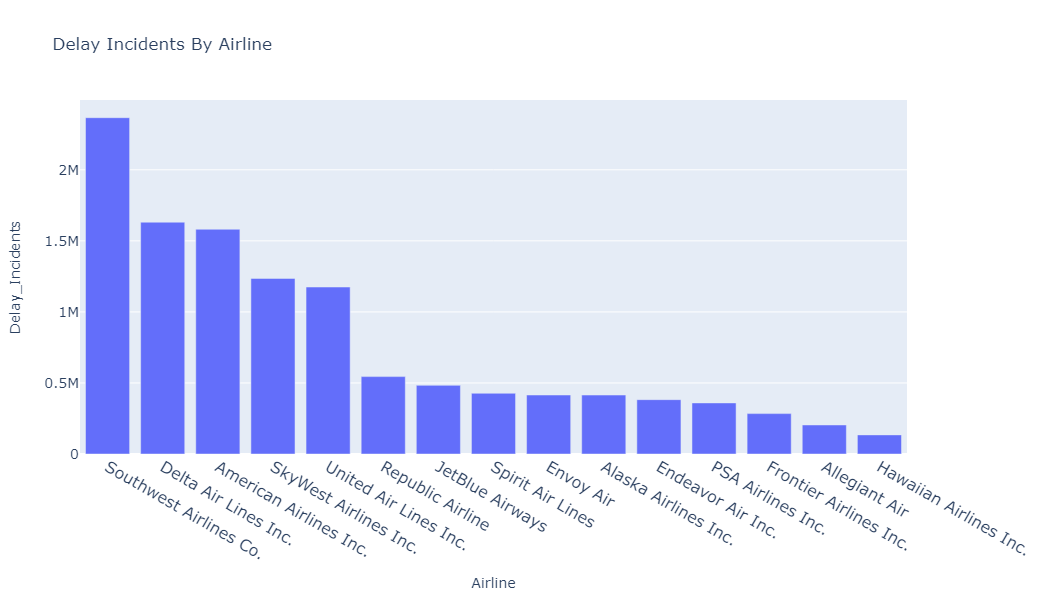

In [20]:
count_airline_delay_df = airline_delay_df.groupby(['Airline']).size().reset_index()
count_airline_delay_df.rename(columns = {0:'Delay_Incidents'}, inplace = True)
count_airline_delay_df.sort_values(by='Delay_Incidents', ascending=False, inplace = True)
count_airline_delay_df = count_airline_delay_df[0:15]
print(count_airline_delay_df)
fig = px.bar(count_airline_delay_df, x='Airline', y='Delay_Incidents', title='Delay Incidents By Airline')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=14, height=600)
fig.show()

In [21]:
data.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK FLIGHT_DATE  \
0  2022        1      1            14            5  2022-01-14   
1  2022        1      1            15            6  2022-01-15   
2  2022        1      1            16            7  2022-01-16   
3  2022        1      1            17            1  2022-01-17   
4  2022        1      1            18            2  2022-01-18   

  REPORTING_AIRLINE  ID_REPORTING_AIRLINE CARRIER_REPORTING_AIRLINE  \
0                YX                 20452                        YX   
1                YX                 20452                        YX   
2                YX                 20452                        YX   
3                YX                 20452                        YX   
4                YX                 20452                        YX   

  TAIL_NUMBER  ...  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  \
0      N119HQ  ...             NaN                  NaN             NaN   
1      N122HQ  ...             NaN                  NaN             NaN   
2      N412YX  ...             NaN                  NaN             NaN   
3      N405YX  ...             NaN                  NaN             NaN   
4      N420YX  ...             NaN                  NaN             NaN   

   TOTAL_ADD_G_TIME LONGEST_ADD_G_TIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST  \
0               NaN                NaN                  0.0              NaN   
1               NaN                NaN                  0.0              NaN   
2               NaN                NaN                  0.0              NaN   
3               NaN                NaN                  0.0              NaN   
4               NaN                NaN                  0.0              NaN   

   DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY  DIV_DISTANCE  
0                      NaN           NaN           NaN  
1                      NaN           NaN           NaN  
2                      NaN           NaN           NaN  
3                      NaN           NaN           NaN  
4                      NaN           NaN           NaN  

[5 rows x 69 columns]

In [22]:
delay_data = data[['REPORTING_AIRLINE', 'DEP_DELAY', 'DEP_DELAY_MINUTES', 'ARR_DELAY', 'ARR_DELAY_MINUTES', 'CANCELLED']]
delay_counts = pd.DataFrame()

In [23]:
for airline in list(set(list(data['REPORTING_AIRLINE']))):
    print(airline, airline_code_mapping[airline])

    airline_specific_data = delay_data[delay_data['REPORTING_AIRLINE'] == airline]

    recorded_airline_specific_data_departure = airline_specific_data[airline_specific_data['DEP_DELAY_MINUTES'].notna()]
    total_fl_dep = len(recorded_airline_specific_data_departure)
    dep_delay_l_10 = len(recorded_airline_specific_data_departure[recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] <= 10])
    dep_delay_b_10_and_30 = len(recorded_airline_specific_data_departure[(recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] > 10) & (recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] <= 30)])
    dep_delay_m_30 = len(recorded_airline_specific_data_departure[recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] > 30])

    recorded_airline_specific_data_arrival = airline_specific_data[airline_specific_data['ARR_DELAY_MINUTES'].notna()]
    total_fl_arr = len(recorded_airline_specific_data_arrival)
    arr_delay_l_10 = len(recorded_airline_specific_data_arrival[recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] <= 10])
    arr_delay_b_10_and_30 = len(recorded_airline_specific_data_arrival[(recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] > 10) & (recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] <= 30)])
    arr_delay_m_30 = len(recorded_airline_specific_data_arrival[recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] > 30])

    cancel_count = sum(airline_specific_data['CANCELLED']*1)

    airline_delay_data = {}

    airline_delay_data['Airline_Code'] = airline

    airline_delay_data['Airline_Name'] = airline_code_mapping[airline]

    airline_delay_data['Total_Recorded_Departure_Flights'] = total_fl_dep
    airline_delay_data['Dep_Delays_L_10'] = round((dep_delay_l_10/total_fl_dep) * 100, 3)
    airline_delay_data['Dep_Delays_B_10_and_30'] = round((dep_delay_b_10_and_30/total_fl_dep) * 100, 3)
    airline_delay_data['Dep_Delays_M_30'] = round((dep_delay_m_30/total_fl_dep) * 100, 3)

    airline_delay_data['Total_Recorded_Arrival_Flights'] = total_fl_arr
    airline_delay_data['Arr_Delays_L_10'] = round((arr_delay_l_10/total_fl_arr) * 100, 3)
    airline_delay_data['Arr_Delays_B_10_and_30'] = round((arr_delay_b_10_and_30/total_fl_arr) * 100, 3)
    airline_delay_data['Arr_Delays_M_30'] = round((arr_delay_m_30/total_fl_arr) * 100, 3)

    airline_delay_data['Cancelled'] = round((cancel_count/len(airline_specific_data)) * 100, 3)

    delay_counts = pd.concat([delay_counts, pd.DataFrame(airline_delay_data, index=[0])], ignore_index=True)

B6 JetBlue Airways
AS Alaska Airlines Inc.
OO SkyWest Airlines Inc.
YX Republic Airline
HA Hawaiian Airlines Inc.
NK Spirit Air Lines
AA American Airlines Inc.
UA United Air Lines Inc.
QX Horizon Air
G4 Allegiant Air
9E Endeavor Air Inc.
WN Southwest Airlines Co.
F9 Frontier Airlines Inc.
MQ Envoy Air
YV Mesa Airlines Inc.
DL Delta Air Lines Inc.
OH PSA Airlines Inc.


In [24]:
display(delay_counts)

Airline_Code            Airline_Name  Total_Recorded_Departure_Flights  \
0            B6         JetBlue Airways                            467824   
1            AS    Alaska Airlines Inc.                            407180   
2            OO   SkyWest Airlines Inc.                           1215407   
3            YX        Republic Airline                            522500   
4            HA  Hawaiian Airlines Inc.                            133169   
5            NK        Spirit Air Lines                            416543   
6            AA  American Airlines Inc.                           1547273   
7            UA   United Air Lines Inc.                           1153922   
8            QX             Horizon Air                             87384   
9            G4           Allegiant Air                            199593   
10           9E       Endeavor Air Inc.                            370511   
11           WN  Southwest Airlines Co.                           2311637   
12           F9  Frontier Airlines Inc.                            276449   
13           MQ               Envoy Air                            407875   
14           YV      Mesa Airlines Inc.                            111050   
15           DL    Delta Air Lines Inc.                           1607832   
16           OH       PSA Airlines Inc.                            350850   

    Dep_Delays_L_10  Dep_Delays_B_10_and_30  Dep_Delays_M_30  \
0            63.870                  12.703           23.427   
1            78.460                  11.313           10.227   
2            82.655                   6.948           10.397   
3            83.454                   6.398           10.147   
4            72.759                  16.891           10.350   
5            69.393                  12.430           18.177   
6            74.260                  10.276           15.463   
7            75.490                  10.640           13.870   
8            82.388                   8.878            8.734   
9            68.138                  13.523           18.339   
10           83.670                   6.290           10.040   
11           67.186                  17.644           15.170   
12           63.224                  13.852           22.923   
13           81.507                   8.722            9.771   
14           77.978                   7.988           14.033   
15           79.052                   9.789           11.159   
16           81.232                   7.413           11.355   

    Total_Recorded_Arrival_Flights  Arr_Delays_L_10  Arr_Delays_B_10_and_30  \
0                           465360           63.883                  12.647   
1                           405602           75.415                  13.609   
2                          1211398           80.476                   8.802   
3                           520344           79.800                   8.893   
4                           133001           69.525                  18.955   
5                           415433           68.648                  12.857   
6                          1541653           72.933                  11.447   
7                          1149859           75.762                  10.476   
8                            87121           79.758                  11.067   
9                           198982           64.486                  14.988   
10                          369299           81.656                   7.730   
11                         2305942           72.040                  14.290   
12                          275612           62.991                  14.135   
13                          406589           78.751                  10.467   
14                          110665           77.695                   8.575   
15                         1603709           79.987                   9.307   
16                          349489           78.383                   9.699   

    Arr_Delays_M_30  Cancelled  
0      

In [25]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_L_10'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_L_10'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (0-10 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

Text(0, 0.5, 'Percent Delay')

Text(0, 0.5, 'Percent Delay')

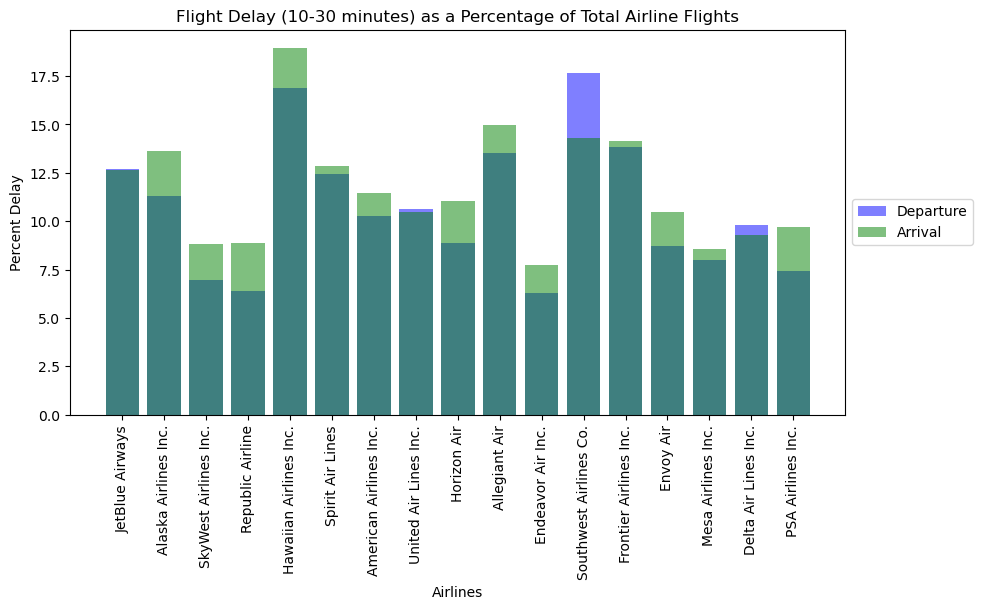

In [26]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_B_10_and_30'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_B_10_and_30'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (10-30 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

Text(0, 0.5, 'Percent Delay')

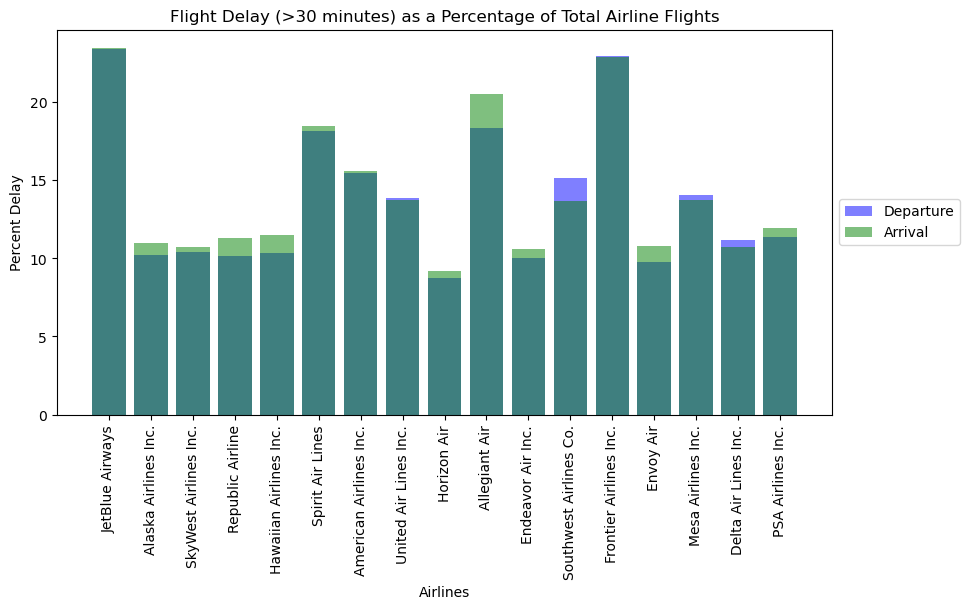

In [27]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_M_30'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_M_30'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (>30 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

In [28]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Cancelled'])
plt.xticks(rotation = 90)
plt.title('Flights Cancelled as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Cancelled')

Text(0, 0.5, 'Percent Cancelled')

### Common Reasons for Delays

In [29]:
carrier_delay_df = df[df['CARRIER_DELAY']>0]
weather_delay_df = df[df['WEATHER_DELAY']>0]
nas_delay_df = df[df['NAS_DELAY']>0]
security_delay_df = df[df['SECURITY_DELAY']>0]
late_delay_df = df[df['LATE_AIRCRAFT_DELAY']>0]

carrier_delay_counts = carrier_delay_df.shape[0]
weather_delay_counts = weather_delay_df.shape[0]
nas_delay_counts = nas_delay_df.shape[0]
security_delay_counts = security_delay_df.shape[0]
late_delay_counts = late_delay_df.shape[0]

In [30]:
data = [['Carrier_Delay', carrier_delay_counts], ['Weather_Delay', weather_delay_counts], ['NAS_Delay', nas_delay_counts],
        ['Security_Delay', security_delay_counts], ['Aircraft_Late_Delay', late_delay_counts]]
count_delay_df = pd.DataFrame(data, columns=['Delay_Type', 'Delay_Count']).sort_values(by='Delay_Count', ascending=False)

In [31]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
           subplot_titles=['Pie-chart', 'Bar Graph'],
)

fig.add_trace(go.Pie(labels=count_delay_df['Delay_Type'],values=count_delay_df['Delay_Count'], name='Pie-chart'),1,1)
fig.add_trace(go.Bar(x=count_delay_df['Delay_Type'], y=count_delay_df['Delay_Count'], name='Bar Graph'), 1,2)

fig.update_layout(title_text='Common Reasons for Delay')
fig.show()

### Common Reasons for Delays Based on Reporting Airline

In [32]:
sum_airline_delay_df = airline_delay_df.groupby(['Airline']).sum().reset_index()

top10_carrier_delay = sum_airline_delay_df[['Airline', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)[:10]
top10_weather_delay = sum_airline_delay_df[['Airline', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)[:10]
top10_nas_delay = sum_airline_delay_df[['Airline', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)[:10]
top10_security_delay = sum_airline_delay_df[['Airline', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)[:10]
top10_late_delay = sum_airline_delay_df[['Airline', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)[:10]

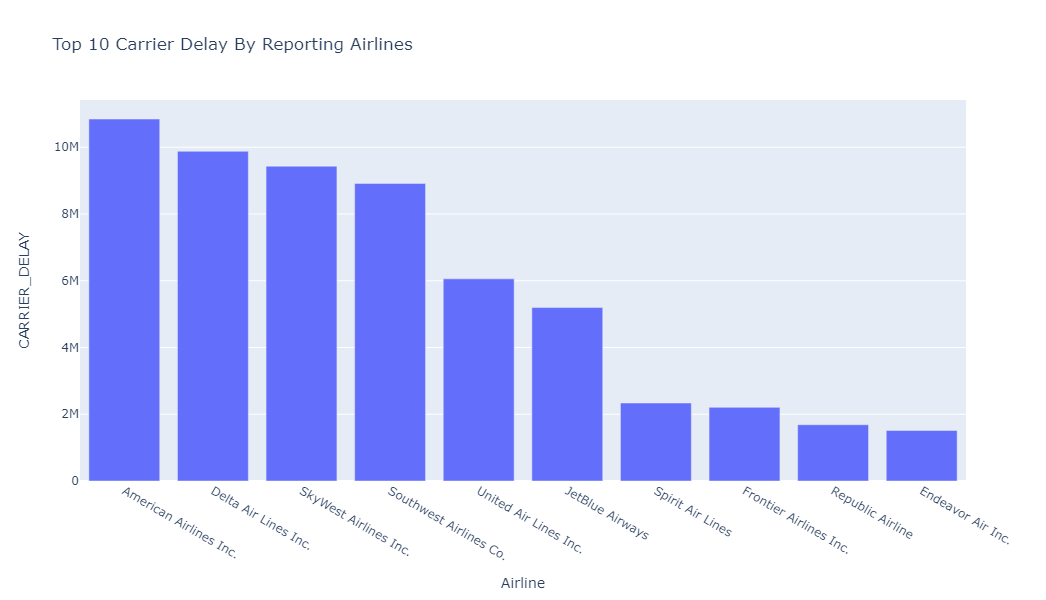

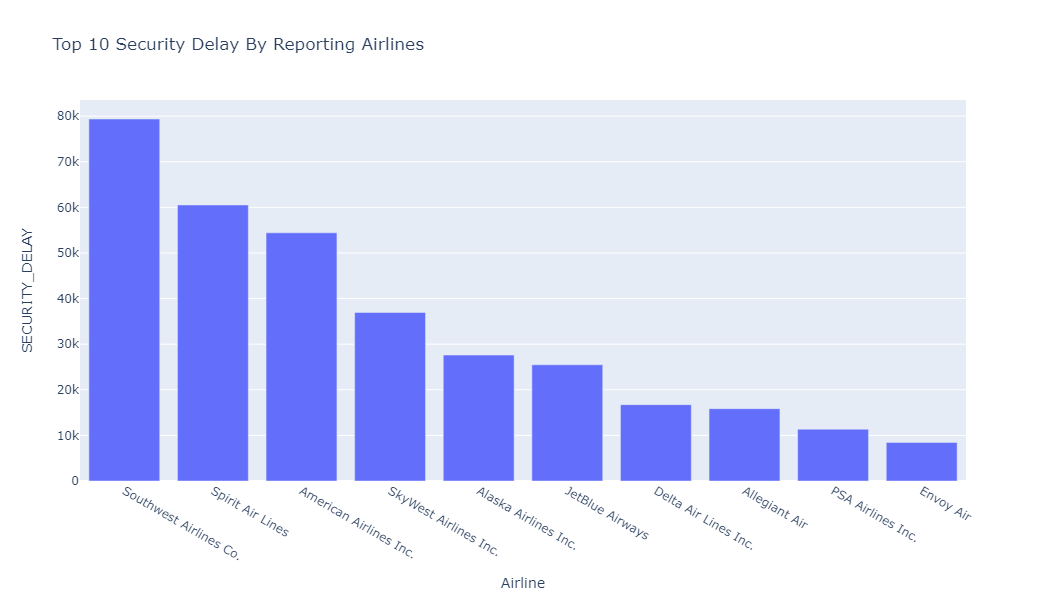

In [33]:
fig = px.bar(top10_carrier_delay, x='Airline', y='CARRIER_DELAY', title='Top 10 Carrier Delay By Reporting Airlines', height = 600)
fig.show()
fig = px.bar(top10_weather_delay, x='Airline', y='WEATHER_DELAY', title='Top 10 Weather Delay By Reporting Airlines', height = 600)
fig.show()
fig = px.bar(top10_nas_delay, x='Airline', y='NAS_DELAY', title='Top 10 NAS Delay By Reporting Airlines', height = 600)
fig.show()
fig = px.bar(top10_security_delay, x='Airline', y='SECURITY_DELAY', title='Top 10 Security Delay By Reporting Airlines', height = 600)
fig.show()
fig = px.bar(top10_late_delay, x='Airline', y='LATE_AIRCRAFT_DELAY', title='Top 10 Late Aircraft Delay By Reporting Airlines', height = 600)
fig.show()

In [34]:
sum_airline_delay_df = airline_delay_df.groupby(['Airline']).sum().reset_index()

carrier_delay = sum_airline_delay_df[['Airline', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)
weather_delay = sum_airline_delay_df[['Airline', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)
nas_delay = sum_airline_delay_df[['Airline', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)
security_delay = sum_airline_delay_df[['Airline', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)
late_delay = sum_airline_delay_df[['Airline', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)

merged_df = pd.merge(carrier_delay, weather_delay, on='Airline')
merged_df = pd.merge(merged_df, nas_delay, on='Airline')
merged_df = pd.merge(merged_df, security_delay, on='Airline')
merged_df = pd.merge(merged_df, late_delay, on='Airline')

display(merged_df)

Airline  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
0   American Airlines Inc.     10844992.0      1423945.0  4190261.0   
1     Delta Air Lines Inc.      9879000.0       971494.0  3288444.0   
2    SkyWest Airlines Inc.      9431868.0      2215459.0   731956.0   
3   Southwest Airlines Co.      8916584.0       625170.0  4324362.0   
4    United Air Lines Inc.      6056620.0       816562.0  3623353.0   
5          JetBlue Airways      5196952.0       354939.0  2156888.0   
6         Spirit Air Lines      2336677.0       348620.0  3120892.0   
7   Frontier Airlines Inc.      2206519.0       180329.0  1361392.0   
8         Republic Airline      1685481.0       390855.0  1975410.0   
9        Endeavor Air Inc.      1514333.0       379753.0  1199937.0   
10       PSA Airlines Inc.      1432981.0       385633.0   782345.0   
11    Alaska Airlines Inc.      1365446.0       172889.0  1135869.0   
12           Allegiant Air      1348759.0       378130.0   957194.0   
13               Envoy Air      1147711.0       525612.0  1045044.0   
14      Mesa Airlines Inc.       912119.0       153242.0   246900.0   
15  Hawaiian Airlines Inc.       803754.0        49776.0    63588.0   
16             Horizon Air       265562.0        50134.0   126450.0   

    SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
0          54411.0           13481061.0  
1          16733.0            5499673.0  
2          36948.0            3736194.0  
3          79354.0           14300134.0  
4           2817.0            7113082.0  
5          25478.0            4720519.0  
6          60517.0            2304160.0  
7              0.0            3163370.0  
8           5029.0            2163011.0  
9           1832.0            1567552.0  
10         11357.0            2187745.0  
11         27609.0            1538590.0  
12         15860.0            1897308.0  
13          8443.0            1729152.0  
14          1805.0             666182.0  
15          5892.0             612927.0  
16          2800.0             317001.0

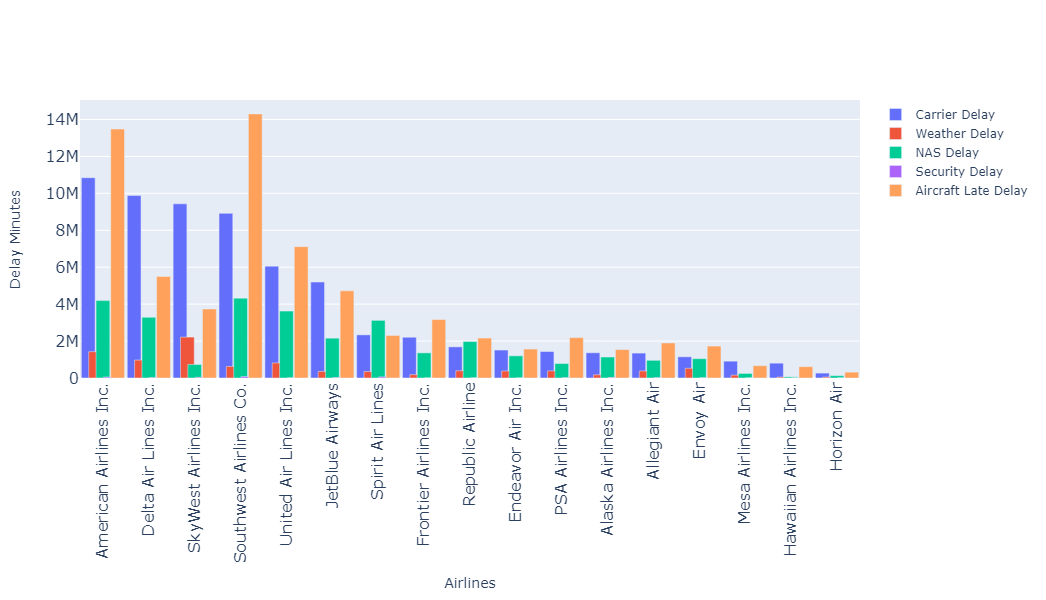

In [35]:

fig = go.Figure()

fig.add_trace(go.Bar(x=carrier_delay['Airline'], y=carrier_delay['CARRIER_DELAY'], name='Carrier Delay'))
fig.add_trace(go.Bar(x=weather_delay['Airline'], y=weather_delay['WEATHER_DELAY'], name='Weather Delay'))
fig.add_trace(go.Bar(x=nas_delay['Airline'], y=nas_delay['NAS_DELAY'], name='NAS Delay'))
fig.add_trace(go.Bar(x=security_delay['Airline'], y=security_delay['SECURITY_DELAY'], name='Security Delay'))
fig.add_trace(go.Bar(x=late_delay['Airline'], y=late_delay['LATE_AIRCRAFT_DELAY'], name='Aircraft Late Delay'))

fig.update_xaxes(tickangle=270)
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16, height=600, xaxis_title="Airlines", yaxis_title="Delay Minutes")
fig.update_traces(width=0.3)

fig.show()

In [36]:
df = pd.read_csv('airline_flight_data.csv')
df = df[df['REPORTING_AIRLINE'] == 'WN']

C:\Users\sanyu\AppData\Local\Temp\ipykernel_23116\269832345.py:1: DtypeWarning:

Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.



In [37]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
# because we only wanted cancelled entries
df1 = df.loc[df['CANCELLED'] == 1.0]

In [38]:
df['DAY_OF_WEEK'].unique()

array([6, 7, 1, 2, 3, 4, 5], dtype=int64)

In [39]:
Sunday = df.loc[df['DAY_OF_WEEK'] == 1].shape[0]
Monday = df.loc[df['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = df.loc[df['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = df.loc[df['DAY_OF_WEEK'] == 4].shape[0]
Thursday = df.loc[df['DAY_OF_WEEK'] == 5].shape[0]
Friday = df.loc[df['DAY_OF_WEEK'] == 6].shape[0]
Saturday = df.loc[df['DAY_OF_WEEK'] == 7].shape[0]

Day  Frequency of Flights
0     Sunday                349687
1     Monday                343262
2    Tuesday                342941
3  Wednesday                348851
4   Thursday                349606
5     Friday                292421
6   Saturday                339984

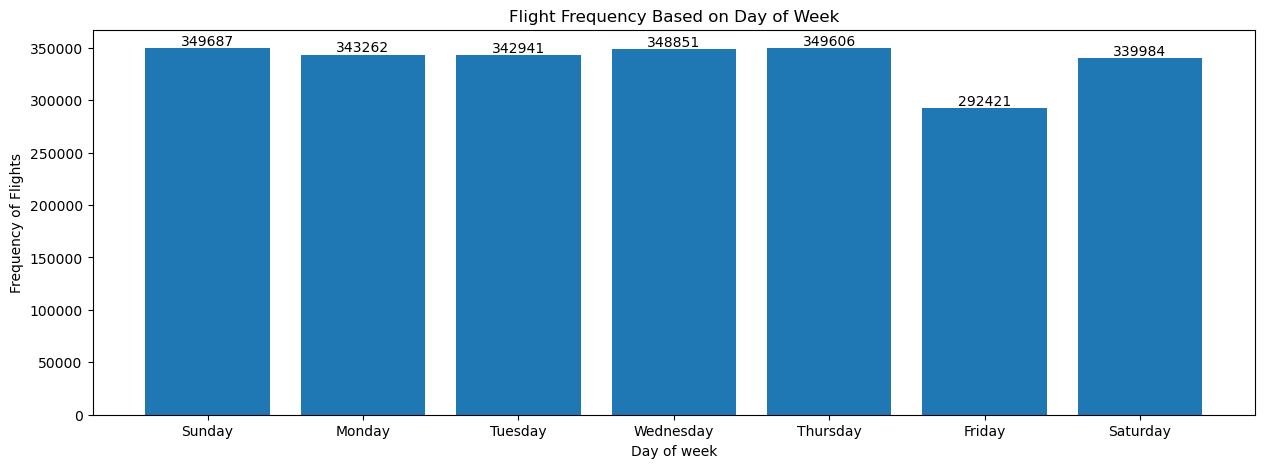

Day  Cancellation Frequency
0     Sunday                    8292
1     Monday                    7454
2    Tuesday                    9866
3  Wednesday                   10459
4   Thursday                    6819
5     Friday                    5612
6   Saturday                    7141

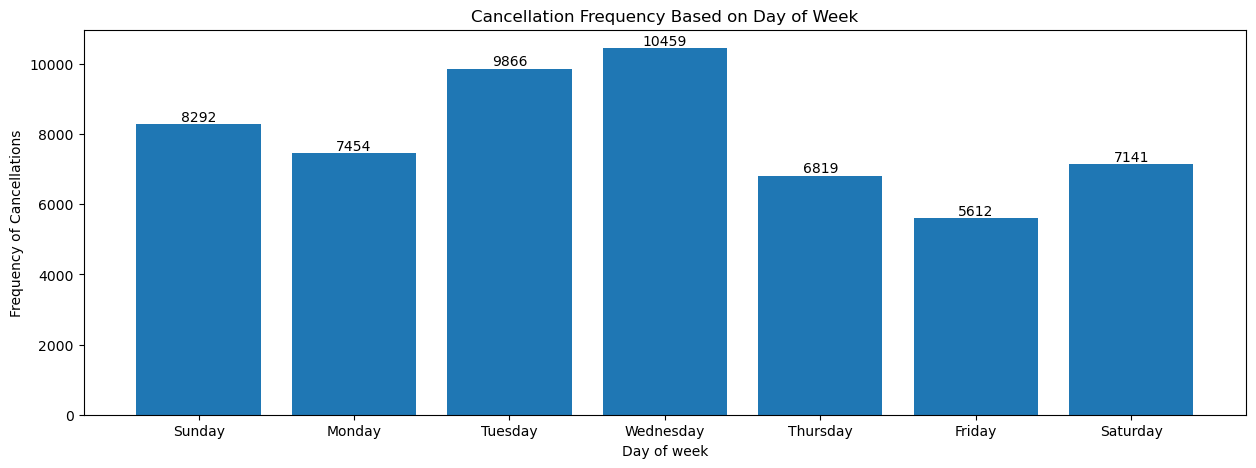

Day  Probability of Cancellation
0     Sunday                     0.023713
1     Monday                     0.021715
2    Tuesday                     0.028769
3  Wednesday                     0.029981
4   Thursday                     0.019505
5     Friday                     0.019192
6   Saturday                     0.021004

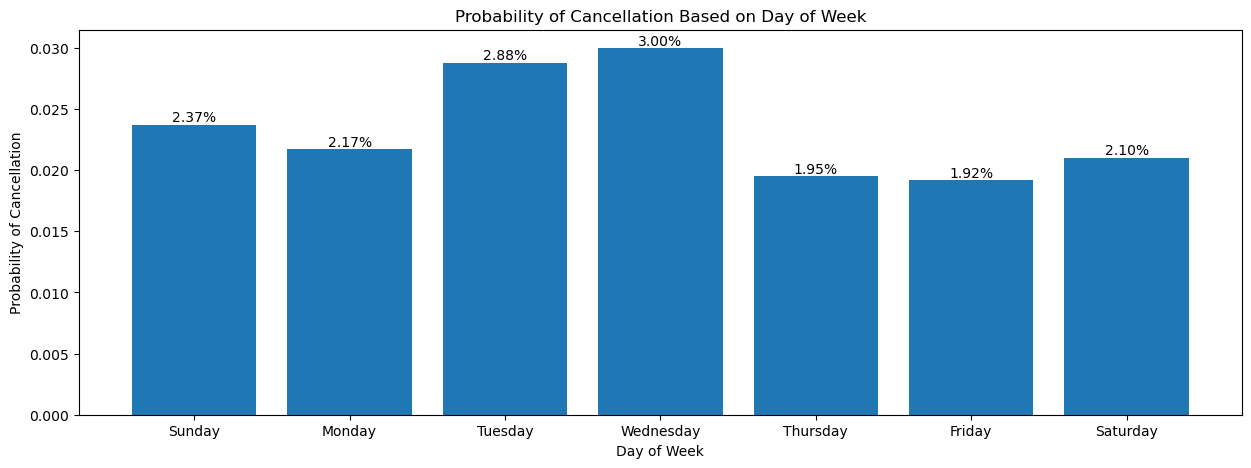

In [40]:
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
flight_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]

tabular_data_df = pd.DataFrame({
    'Day': labels,
    'Frequency of Flights': flight_data
})

display(tabular_data_df)

plt.figure(figsize=(15, 5))
plt.xticks(range(len(flight_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Flight Frequency Based on Day of Week')
bars = plt.bar(range(len(flight_data)), flight_data)

for bar, label in zip(bars, flight_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.show()

Sunday1 = df1.loc[df1['DAY_OF_WEEK'] == 1].shape[0]
Monday1 = df1.loc[df1['DAY_OF_WEEK'] == 2].shape[0]
Tuesday1 = df1.loc[df1['DAY_OF_WEEK'] == 3].shape[0]
Wednesday1 = df1.loc[df1['DAY_OF_WEEK'] == 4].shape[0]
Thursday1 = df1.loc[df1['DAY_OF_WEEK'] == 5].shape[0]
Friday1 = df1.loc[df1['DAY_OF_WEEK'] == 6].shape[0]
Saturday1 = df1.loc[df1['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cancel_data = [Sunday1, Monday1, Tuesday1, Wednesday1, Thursday1, Friday1, Saturday1]

tabular_data_df = pd.DataFrame({'Day': labels,'Cancellation Frequency': cancel_data})

display(tabular_data_df)

plt.figure(figsize=(15, 5))
plt.xticks(range(len(cancel_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Cancellations')
plt.title('Cancellation Frequency Based on Day of Week')
bars_cancel = plt.bar(range(len(cancel_data)), cancel_data)

for bar, label in zip(bars_cancel, cancel_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
chance_data = list(map(truediv, cancel_data, flight_data))

tabular_data_df = pd.DataFrame({'Day': labels,'Probability of Cancellation': chance_data})

display(tabular_data_df)

plt.figure(figsize=(15, 5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Cancellation')
plt.title('Probability of Cancellation Based on Day of Week')
bars_chance = plt.bar(range(len(chance_data)), chance_data)

for bar, label in zip(bars_chance, chance_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2%}', ha='center', va='bottom')

plt.show()


In [41]:
delay_df = df.loc[df['CANCELLED'] == 0.0]
delay_df.head()

s_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(0.1,10.0)]
m_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(10.1,30.0)]
l_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(30.1,60.0)]

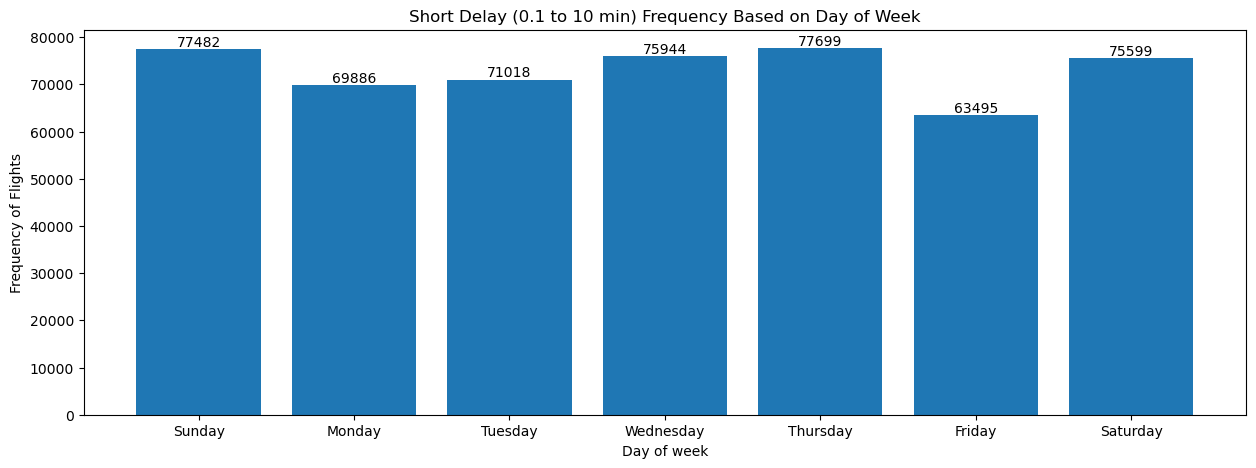

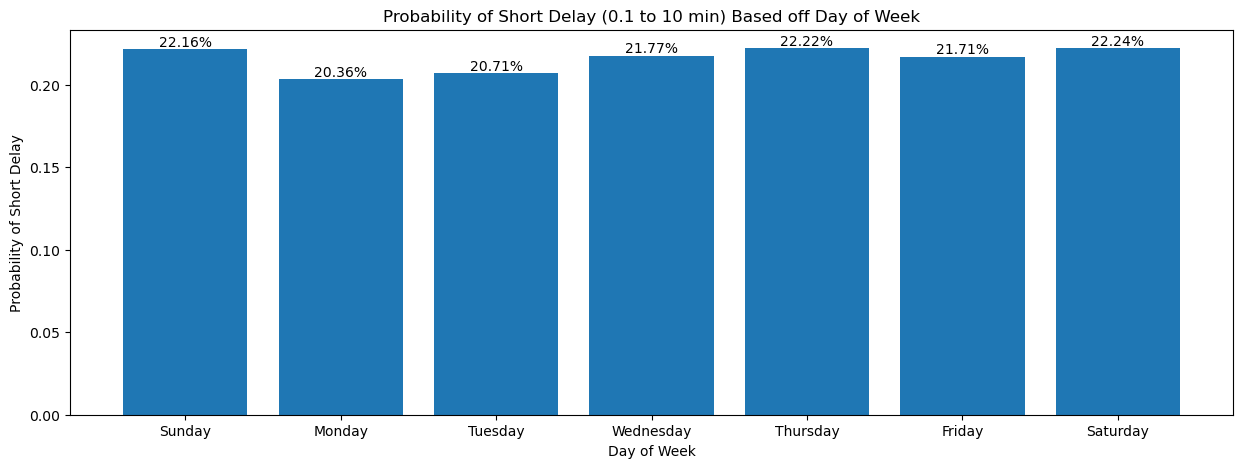

In [42]:

Sunday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 1].shape[0]
Monday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 4].shape[0]
Thursday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 5].shape[0]
Friday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 6].shape[0]
Saturday = s_d_df.loc[s_d_df['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
short_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Short Delay (0.1 to 10 min) Frequency Based on Day of Week')
plt.bar(range(len(short_delay_data)), short_delay_data)
for i, value in enumerate(short_delay_data):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# try using zip
chance_data = list(map(truediv, short_delay_data, flight_data))

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Short Delay')
plt.title('Probability of Short Delay (0.1 to 10 min) Based off Day of Week')
plt.bar(range(len(chance_data)), chance_data)
for i, value in enumerate(chance_data):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

plt.show()

In [43]:
Sunday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 1].shape[0]
Monday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 4].shape[0]
Thursday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 5].shape[0]
Friday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 6].shape[0]
Saturday = m_d_df.loc[m_d_df['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
medium_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Medium Delay (10.1 to 30 min) Frequency Based on Day of Week')
bars = plt.bar(range(len(medium_delay_data)), medium_delay_data)

for bar, value in zip(bars, medium_delay_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom')

plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
chance_data = list(map(truediv, medium_delay_data, flight_data))

plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Medium Delay')
plt.title('Probability of Medium Delay (10.1 to 30 min) Based off Day of Week')
bars = plt.bar(range(len(chance_data)), chance_data)

for bar, value in zip(bars, chance_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{value:.2%}', ha='center', va='bottom')

plt.show()

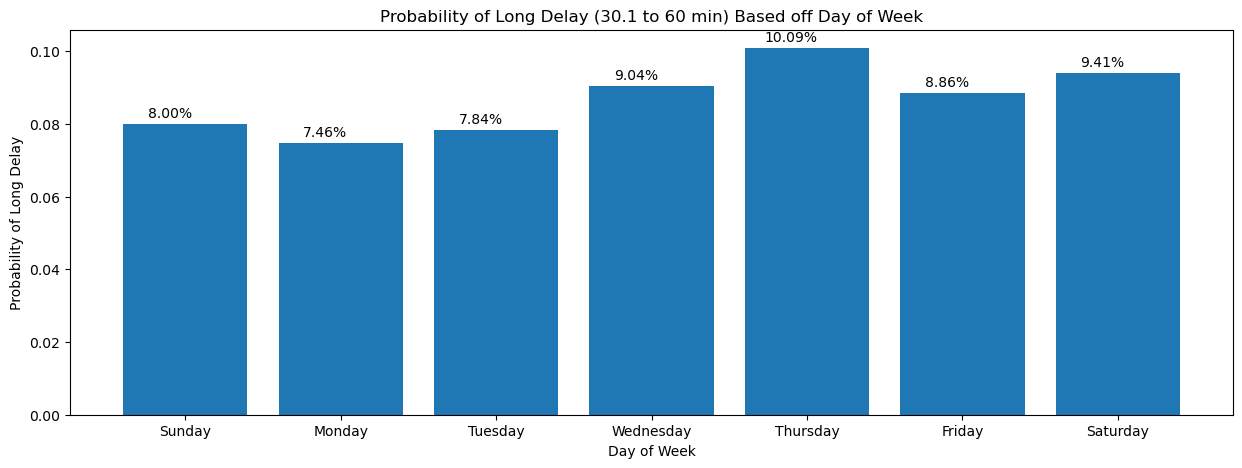

In [44]:
Sunday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 1].shape[0]
Monday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 4].shape[0]
Thursday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 5].shape[0]
Friday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 6].shape[0]
Saturday = l_d_df.loc[l_d_df['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
long_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15, 5))
plt.xticks(range(len(long_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Long Delay (30.1 to 60 min) Frequency Based on Day of Week')

bars = plt.bar(range(len(long_delay_data)), long_delay_data)

for bar, value in zip(bars, long_delay_data):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(value), ha='center', va='bottom')

plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
chance_data = list(map(truediv, long_delay_data, flight_data))
plt.figure(figsize=(15, 5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Long Delay')
plt.title('Probability of Long Delay (30.1 to 60 min) Based off Day of Week')

bars = plt.bar(range(len(chance_data)), chance_data)

for bar, value in zip(bars, chance_data):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.001, f'{value:.2%}', ha='center', va='bottom')

plt.show()

In [45]:
cancelled_flight_df = df.loc[df['CANCELLED'] == 1.0]

Time Interval  Frequency of Flights
0            0-1                     0
1            1-2                     0
2            2-3                     0
3            3-4                     0
4            4-5                     0
5            5-6                113643
6            6-7                176273
7            7-8                130261
8            8-9                158028
9           9-10                128520
10         10-11                147646
11         11-12                132932
12         12-13                137737
13         13-14                136062
14         14-15                129667
15         15-16                130743
16         16-17                136772
17         17-18                131515
18         18-19                141970
19         19-20                146374
20         20-21                119084
21         21-22                106962
22         22-23                 62275
23         23-24                   288

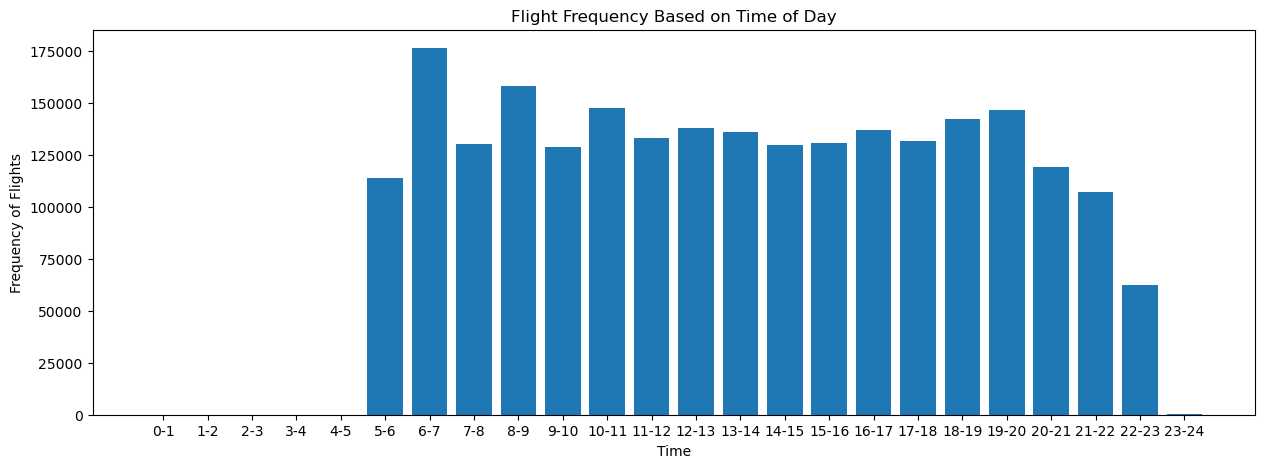

In [46]:
hour0 = df.loc[df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = df.loc[df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = df.loc[df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = df.loc[df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = df.loc[df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = df.loc[df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = df.loc[df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = df.loc[df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = df.loc[df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = df.loc[df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = df.loc[df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = df.loc[df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = df.loc[df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = df.loc[df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = df.loc[df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = df.loc[df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = df.loc[df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = df.loc[df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = df.loc[df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = df.loc[df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = df.loc[df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = df.loc[df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = df.loc[df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = df.loc[df['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
flight_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

tabular_data_df = pd.DataFrame({'Time Interval': labels,'Frequency of Flights': flight_data})

display(tabular_data_df)

plt.figure(figsize=(15,5))
plt.xticks(range(len(flight_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Flights')
plt.title('Flight Frequency Based on Time of Day')
plt.bar(range(len(flight_data)), flight_data)
plt.show()

Time Interval  Frequency of Flights  Probability
0            0-1                     0     0.000000
1            1-2                     0     0.000000
2            2-3                     0     0.000000
3            3-4                     0     0.000000
4            4-5                     0     0.000000
5            5-6                  2499     0.001056
6            6-7                  3880     0.001639
7            7-8                  2698     0.001140
8            8-9                  2903     0.001227
9           9-10                  2404     0.001016
10         10-11                  2722     0.001150
11         11-12                  2517     0.001063
12         12-13                  2868     0.001212
13         13-14                  2921     0.001234
14         14-15                  2943     0.001243
15         15-16                  3067     0.001296
16         16-17                  3515     0.001485
17         17-18                  3508     0.001482
18         18-19                  3936     0.001663
19         19-20                  4206     0.001777
20         20-21                  3708     0.001567
21         21-22                  3149     0.001331
22         22-23                  2081     0.000879
23         23-24                   118     0.000050

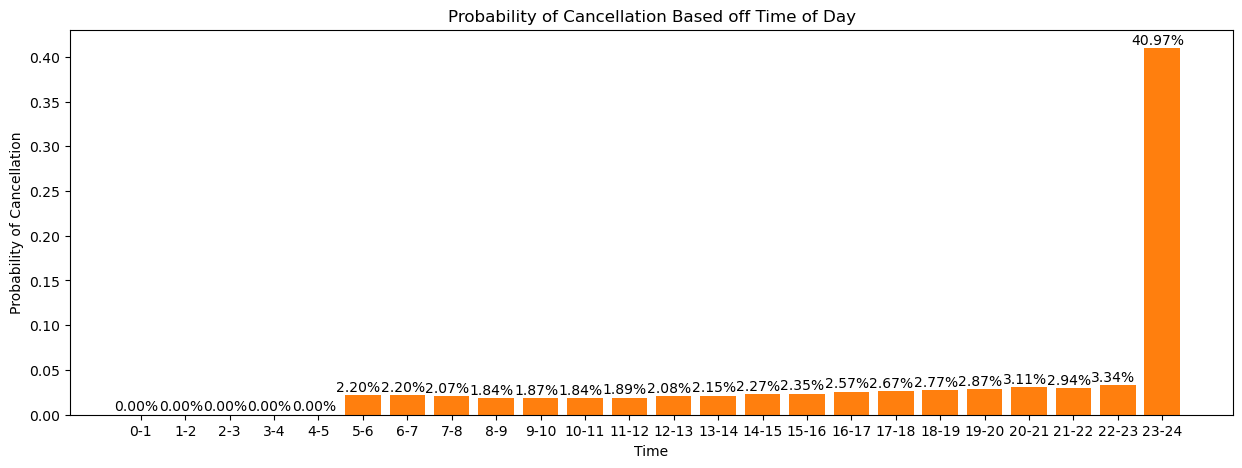

In [47]:
hour0 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = cancelled_flight_df.loc[cancelled_flight_df['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
cancel_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

tabular_data_df = pd.DataFrame({
    'Time Interval': labels,
    'Frequency of Flights': cancel_data
})

tabular_data_df['Probability'] = tabular_data_df['Frequency of Flights'] / np.sum(flight_data)

display(tabular_data_df)

plt.figure(figsize=(15,5))
plt.xticks(range(len(cancel_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Cancellations')
plt.title('Cancellation Frequency Based on Time of Day')
plt.bar(range(len(cancel_data)), cancel_data)
plt.show()

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

chance_data = list(map(lambda x, y: 0 if y == 0 else x / y, cancel_data, flight_data))


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Cancellation')
plt.title('Probability of Cancellation Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)

bars = plt.bar(range(len(chance_data)), chance_data)

for bar, value in zip(bars, chance_data):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.001, f'{value:.2%}', ha='center', va='bottom')

plt.show()

In [48]:
delay_df = df.loc[df['CANCELLED'] == 0.0]

s_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(0.1,10.0)]
m_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(10.1,30.0)]
l_d_df = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(30.1,60.0)]

Time Interval  Frequency of Flights  Probability
0            0-1                     0     0.000000
1            1-2                     0     0.000000
2            2-3                     0     0.000000
3            3-4                     0     0.000000
4            4-5                     0     0.000000
5            5-6                 20515     0.008668
6            6-7                 30001     0.012676
7            7-8                 23929     0.010110
8            8-9                 35068     0.014817
9           9-10                 29849     0.012612
10         10-11                 36530     0.015435
11         11-12                 33542     0.014172
12         12-13                 35729     0.015096
13         13-14                 35176     0.014863
14         14-15                 32785     0.013852
15         15-16                 31743     0.013412
16         16-17                 31386     0.013261
17         17-18                 28518     0.012049
18         18-19                 28921     0.012220
19         19-20                 28519     0.012050
20         20-21                 21102     0.008916
21         21-22                 18042     0.007623
22         22-23                  9730     0.004111
23         23-24                    38     0.000016

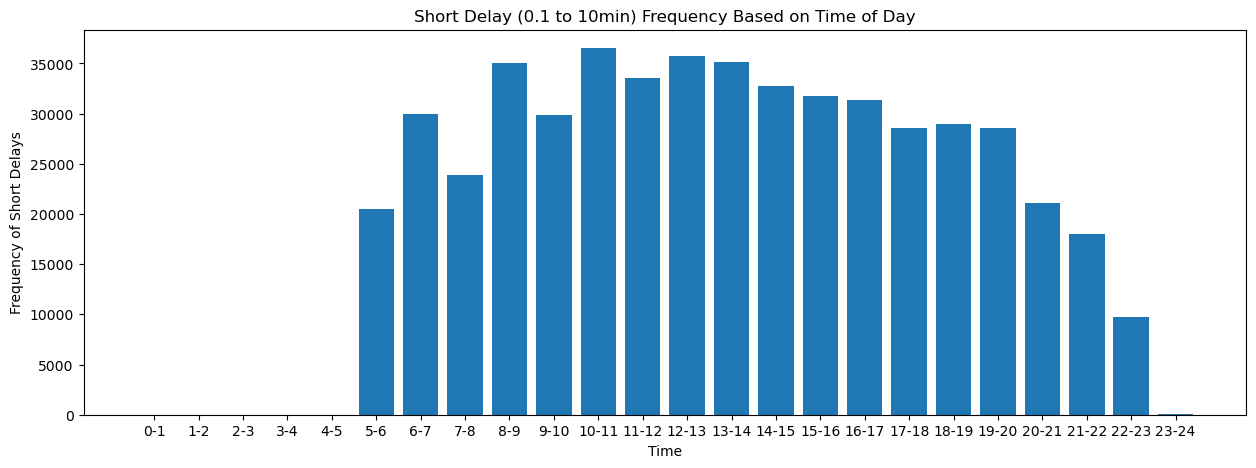

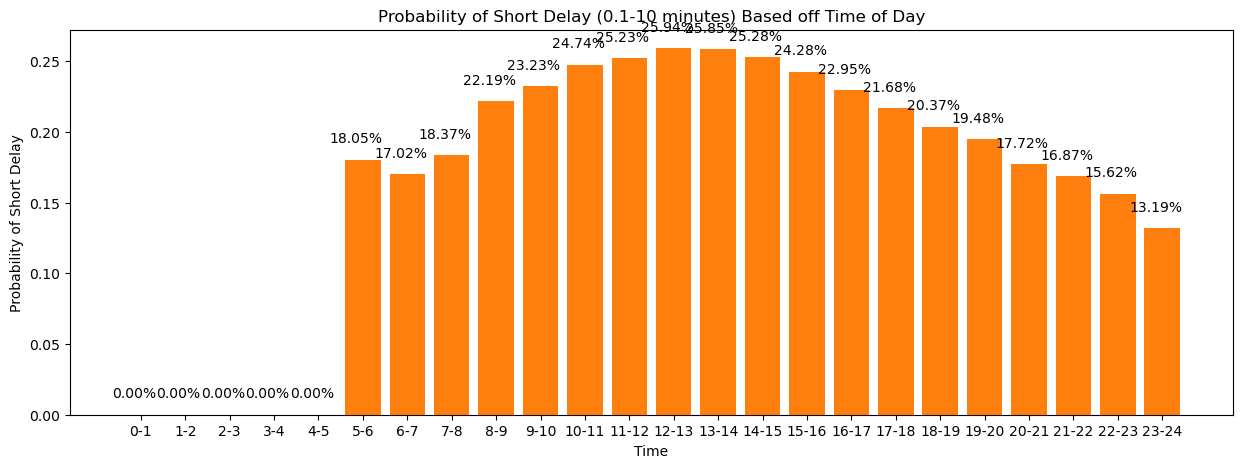

In [49]:
hour0 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = s_d_df.loc[s_d_df['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
short_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

tabular_data_df = pd.DataFrame({
    'Time Interval': labels,
    'Frequency of Flights': short_delay_data
})

tabular_data_df['Probability'] = tabular_data_df['Frequency of Flights'] / np.sum(flight_data)

display(tabular_data_df)

plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Short Delays')
plt.title('Short Delay (0.1 to 10min) Frequency Based on Time of Day')
plt.bar(range(len(short_delay_data)), short_delay_data)
plt.show()

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
chance_data = list(map(lambda x, y: 0 if y == 0 else x / y, short_delay_data, flight_data))

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Short Delay')
plt.title('Probability of Short Delay (0.1-10 minutes) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)

bars = plt.bar(range(len(chance_data)), chance_data)

for bar, label in zip(bars, chance_data):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{label:.2%}', ha='center', va='bottom')

plt.show()

Time Interval  Frequency of Flights  Probability
0            0-1                     0     0.000000
1            1-2                     0     0.000000
2            2-3                     0     0.000000
3            3-4                     0     0.000000
4            4-5                     0     0.000000
5            5-6                  6067     0.002563
6            6-7                  8979     0.003794
7            7-8                  9710     0.004103
8            8-9                 16547     0.006991
9           9-10                 16692     0.007053
10         10-11                 21003     0.008874
11         11-12                 21671     0.009156
12         12-13                 25342     0.010708
13         13-14                 28662     0.012110
14         14-15                 29612     0.012512
15         15-16                 30285     0.012796
16         16-17                 32138     0.013579
17         17-18                 30406     0.012847
18         18-19                 31944     0.013497
19         19-20                 33169     0.014015
20         20-21                 26170     0.011057
21         21-22                 24540     0.010369
22         22-23                 14824     0.006263
23         23-24                    33     0.000014

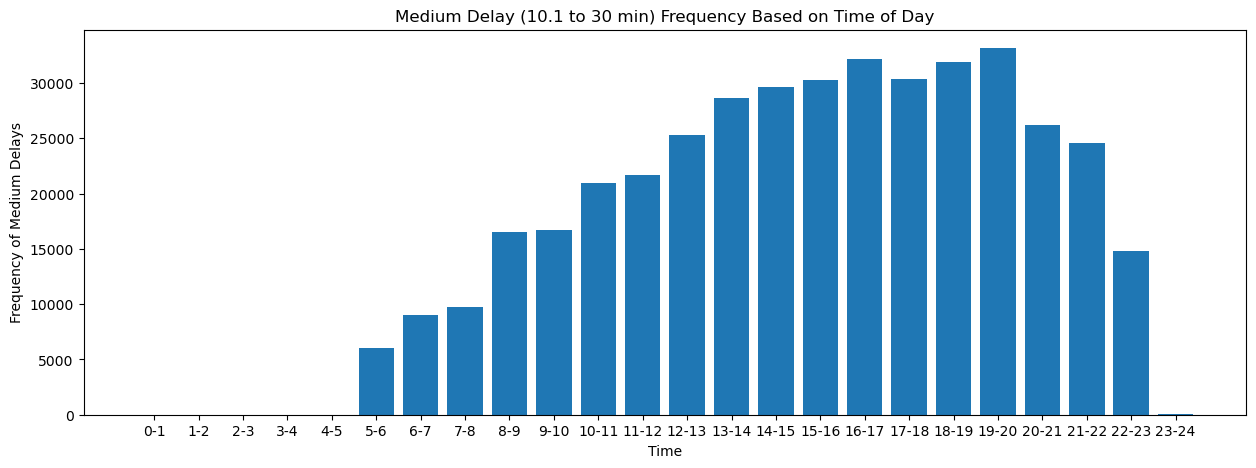

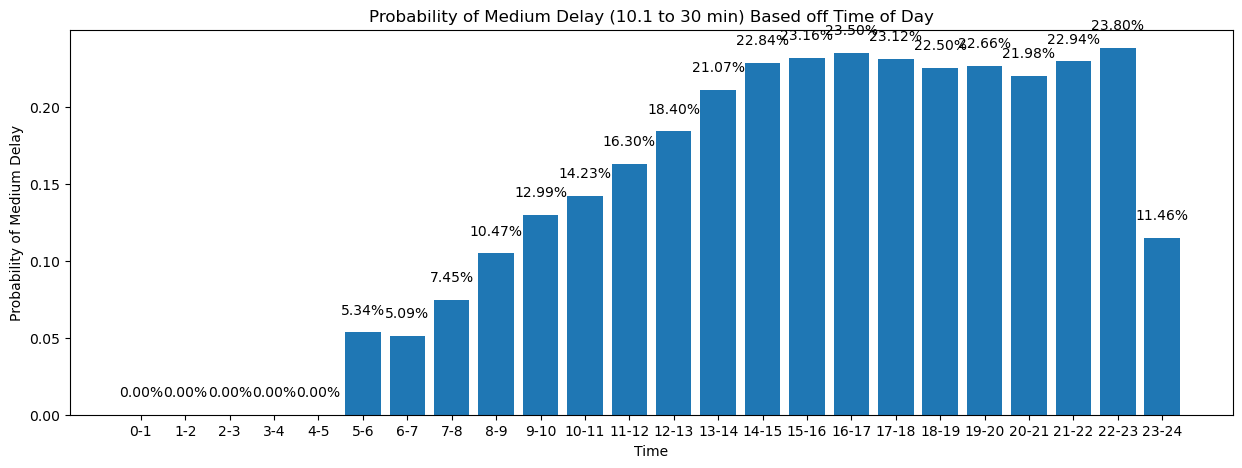

In [50]:
hour0 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = m_d_df.loc[m_d_df['CRS_DEP_TIME'].between(2300,2399)].shape[0]


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
medium_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

tabular_data_df = pd.DataFrame({
    'Time Interval': labels,
    'Frequency of Flights': medium_delay_data
})

tabular_data_df['Probability'] = tabular_data_df['Frequency of Flights'] / np.sum(flight_data)

display(tabular_data_df)

plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Medium Delays')
plt.title('Medium Delay (10.1 to 30 min) Frequency Based on Time of Day')
plt.bar(range(len(medium_delay_data)), medium_delay_data)
plt.show()



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

chance_data = list(map(lambda x, y: 0 if y == 0 else x / y, medium_delay_data, flight_data))



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Medium Delay')
plt.title('Probability of Medium Delay (10.1 to 30 min) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)

for i, v in enumerate(chance_data):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

plt.show()

Time Interval  Frequency of Flights  Probability
0            0-1                     0     0.000000
1            1-2                     0     0.000000
2            2-3                     0     0.000000
3            3-4                     0     0.000000
4            4-5                     0     0.000000
5            5-6                  1646     0.000695
6            6-7                  2853     0.001205
7            7-8                  3237     0.001368
8            8-9                  5396     0.002280
9           9-10                  5737     0.002424
10         10-11                  7548     0.003189
11         11-12                  7944     0.003356
12         12-13                  9923     0.004193
13         13-14                 12045     0.005089
14         14-15                 13582     0.005739
15         15-16                 15155     0.006403
16         16-17                 16931     0.007154
17         17-18                 17022     0.007192
18         18-19                 19405     0.008199
19         19-20                 20663     0.008731
20         20-21                 17562     0.007420
21         21-22                 17057     0.007207
22         22-23                 11393     0.004814
23         23-24                    28     0.000012

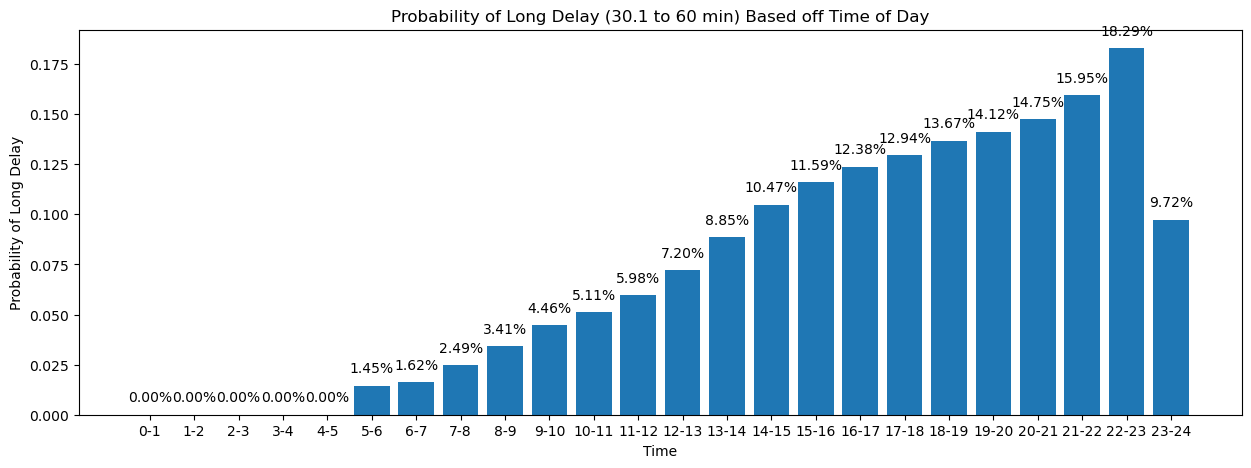

In [51]:
hour0 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = l_d_df.loc[l_d_df['CRS_DEP_TIME'].between(2300,2399)].shape[0]



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
long_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

tabular_data_df = pd.DataFrame({
    'Time Interval': labels,
    'Frequency of Flights': long_delay_data
})

tabular_data_df['Probability'] = tabular_data_df['Frequency of Flights'] / np.sum(flight_data)

display(tabular_data_df)

plt.figure(figsize=(15,5))
plt.xticks(range(len(long_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Long Delays')
plt.title('Frequency of Long Delays (30.1 to 60 min) Based on Time of Day')
plt.bar(range(len(long_delay_data)), long_delay_data)
plt.show()


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

chance_data = list(map(lambda x, y: 0 if y == 0 else x / y, long_delay_data, flight_data))

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Long Delay')
plt.title('Probability of Long Delay (30.1 to 60 min) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)

#important
for i, v in enumerate(chance_data):
    plt.text(i, v + 0.005, f'{v:.2%}', ha='center', va='bottom')

plt.show()

<a id="Preprocessing"></a> <br>
# **7) Preprocessing for Classification Model:**



In [52]:
display(df)

Unnamed: 0  YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  \
283340        283340  2022        1      1             1            6   
283341        283341  2022        1      1             1            6   
283342        283342  2022        1      1             1            6   
283343        283343  2022        1      1             1            6   
283344        283344  2022        1      1             1            6   
...              ...   ...      ...    ...           ...          ...   
11819041    11819041  2023        3      9            30            6   
11819042    11819042  2023        3      9            30            6   
11819043    11819043  2023        3      9            30            6   
11819044    11819044  2023        3      9            30            6   
11819045    11819045  2023        3      9            30            6   

         FLIGHT_DATE REPORTING_AIRLINE  ID_REPORTING_AIRLINE  \
283340    2022-01-01                WN                 19393   
283341    2022-01-01                WN                 19393   
283342    2022-01-01                WN                 19393   
283343    2022-01-01                WN                 19393   
283344    2022-01-01                WN                 19393   
...              ...               ...                   ...   
11819041  2023-09-30                WN                 19393   
11819042  2023-09-30                WN                 19393   
11819043  2023-09-30                WN                 19393   
11819044  2023-09-30                WN                 19393   
11819045  2023-09-30                WN                 19393   

         CARRIER_REPORTING_AIRLINE TAIL_NUMBER  \
283340                          WN      N913WN   
283341                          WN      N8536Z   
283342                          WN      N8680C   
283343                          WN      N7820L   
283344                          WN      N8664J   
...                            ...         ...   
11819041                        WN      N479WN   
11819042                        WN      N291WN   
11819043                        WN      N441WN   
11819044                        WN      N449WN   
11819045                        WN      N472WN   

          FLIGHT_NUMBER_REPORTING_AIRLINE  ORIGIN_AIRPORT_ID  \
283340                               1548              10140   
283341                               2906              10140   
283342                               2945              10140   
283343                                489              10140   
283344                                826              10140   
...                                   ...                ...   
11819041                             3033              15624   
11819042                             3691              15624   
11819043                             2961              15624   
11819044                             4824              15624   
11819045                             2054              15624   

          ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
283340                  1014005                  30140    ABQ   
283341                  1014005                  30140    ABQ   
283342                  1014005                  30140    ABQ   
283343                  1014005                  30140    ABQ   
283344                  1014005                  30140    ABQ   
...                         ...                    ...    ...   
11819041                1562404                  31504    VPS   
11819042                1562404                  31504    VPS   
11819043                1562404                  31504    VPS   
11819044                1562404                  31504    VPS   
11819045                1562404                  31504    VPS   

         ORIGIN_CITY_NAME ORIGIN_STATE  ORIGIN_STATE_FIPS ORIGIN_STATE_NAME  \
283340    Albuquerque, NM           NM                 35        New Mexico   
283341    Albuquerque, NM           NM                 

In [53]:
df = df[df['REPORTING_AIRLINE'] == "WN"]
df.head()
df.shape

(2366752, 70)

In [54]:
df = df.drop(['Unnamed: 0','CARRIER_REPORTING_AIRLINE','TAIL_NUMBER','FLIGHT_DATE','ORIGIN_STATE_NAME', 'ORIGIN_STATE', 'ORIGIN_CITY_NAME', 'DIV_AIRPORT_LANDINGS',
                          'DEST_STATE_NAME', 'DEST_STATE', 'DEST_CITY_NAME', 'DEP_TIME_BLK','ARR_TIME_BLK','TAXI_OUT','TAXI_IN','WHEELS_ON','ACTUAL_ELAPSED_TIME',
                         'YEAR','QUARTER','ID_REPORTING_AIRLINE','FLIGHT_NUMBER_REPORTING_AIRLINE','ORIGIN_AIRPORT_ID','ORIGIN_CITY_MARKET_ID',
                         'ORIGIN_AIRPORT_SEQ_ID','ORIGIN_STATE_FIPS','ORIGIN_WAC','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID',
                         'DEST_STATE_FIPS','DEST_WAC','CRS_DEP_TIME','DEPARTURE_DELAY_GROUPS','CRS_ARR_TIME','ARRIVAL_DELAY_GROUPS','CRS_ELAPSED_TIME'], axis=1)

In [55]:
df.describe().T

count         mean         std   min     25%  \
MONTH                    2366752.0     5.996252    3.154408   1.0     3.0   
DAY_OF_MONTH             2366752.0    15.752594    8.783759   1.0     8.0   
DAY_OF_WEEK              2366752.0     3.947554    1.996702   1.0     2.0   
DEP_TIME                 2311637.0  1341.655196  519.269029   1.0   903.0   
DEP_DELAY                2311637.0    13.723537   32.555571 -52.0    -3.0   
DEP_DELAY_MINUTES        2311637.0    15.203565   31.769954   0.0     0.0   
DEP_DEL_15               2311637.0     0.276608    0.447321   0.0     0.0   
WHEELS_OFF               2311245.0  1360.788623  519.930343   1.0   916.0   
ARR_TIME                 2310545.0  1434.733365  570.781665   1.0  1017.0   
ARR_DELAY                2305942.0     7.212018   34.943965 -69.0   -11.0   
ARR_DELAY_MINUTES        2305942.0    13.521560   31.454324   0.0     0.0   
ARR_DEL_15               2305942.0     0.238981    0.426461   0.0     0.0   
CANCELLED                2366752.0     0.023510    0.151518   0.0     0.0   
DIVERTED                 2366752.0     0.002183    0.046673   0.0     0.0   
AIR_TIME                 2305942.0   100.024760   54.474423  12.0    59.0   
FLIGHTS                  2366752.0     1.000000    0.000000   1.0     1.0   
DISTANCE                 2366752.0   719.925672  454.992412  73.0   373.0   
DISTANCE_GROUP           2366752.0     3.366068    1.824714   1.0     2.0   
CARRIER_DELAY             551076.0    16.180316   30.166858   0.0     0.0   
WEATHER_DELAY             551076.0     1.134453   11.505018   0.0     0.0   
NAS_DELAY                 551076.0     7.847125   19.804167   0.0     0.0   
SECURITY_DELAY            551076.0     0.143998    3.276908   0.0     0.0   
LATE_AIRCRAFT_DELAY       551076.0    25.949477   38.150661   0.0     0.0   
FIRST_DEP_TIME              7543.0  1300.209201  526.614319   1.0   825.0   
TOTAL_ADD_G_TIME            7543.0    28.578285   30.570938   1.0    11.0   
LONGEST_ADD_G_TIME          7543.0    28.068540   29.431409   1.0    11.0   
DIV_REACHED_DEST            5167.0     0.890846    0.311863   0.0     1.0   
DIV_ACTUAL_ELAPSED_TIME     4603.0   322.938953   96.397033   0.0   258.0   
DIV_ARR_DELAY               4603.0   191.729741   84.886664   0.0   135.0   
DIV_DISTANCE                5167.0    38.848268  154.813201   0.0     0.0   

                            50%     75%     max  
MONTH                       6.0     8.0    12.0  
DAY_OF_MONTH               16.0    23.0    31.0  
DAY_OF_WEEK                 4.0     6.0     7.0  
DEP_TIME                 1330.0  1805.0  2400.0  
DEP_DELAY                   2.0    17.0   775.0  
DEP_DELAY_MINUTES           2.0    17.0   775.0  
DEP_DEL_15                  0.0     1.0     1.0  
WHEELS_OFF               1341.0  1817.0  2400.0  
ARR_TIME                 1449.0  1917.0  2400.0  
ARR_DELAY                  -3.0    13.0   812.0  
ARR_DELAY_MINUTES           0.0    13.0   812.0  
ARR_DEL_15                  0.0     0.0     1.0  
CANCELLED                   0.0     0.0     1.0  
DIVERTED                    0.0     0.0     1.0  
AIR_TIME                   88.0   127.0   503.0  
FLIGHTS                     1.0     1.0     1.0  
DISTANCE                  621.0   942.0  2979.0  
DISTANCE_GROUP              3.0     4.0    11.0  
CARRIER_DELAY               7.0    19.0   741.0  
WEATHER_DELAY               0.0     0.0   726.0  
NAS_DELAY                   0.0     8.0   731.0  
SECURITY_DELAY              0.0     0.0   581.0  
LATE_AIRCRAFT_DELAY        15.0    33.0   636.0  
FIRST_DEP_TIME           1325.0  1730.0  2400.0  
TOTAL_ADD_G_TIME           19.0    33.0   287.0  
LONGEST_ADD_G_TIME         19.0    32.0   287.0  
DIV_REACHED_DEST            1.0     1.0     1.0  
DIV_ACTUAL_ELAPSED_TIME   304.0   369.0   918.0  
DIV_ARR_DELAY             175.0   230.0   811.0  
DIV_DISTANCE                0.0     0.0  2569.0

In [56]:
# handling null values
null_df = df.isnull().sum().to_frame()
#null_df[null_df[0] != 0]

In [57]:
df.dropna(subset=['CANCELLATION_CODE'], inplace=True)

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
col_drop = null_df[null_df[0] > 5000000].index

df_clean = df.drop(col_drop, axis=1)
df_clean

MONTH  DAY_OF_MONTH  DAY_OF_WEEK REPORTING_AIRLINE ORIGIN DEST  \
0          1             1            6                WN    ABQ  MDW   
1          1             1            6                WN    ABQ  MDW   
2          1             1            6                WN    ALB  MCO   
3          1             1            6                WN    ALB  MDW   
4          1             1            6                WN    ATL  DEN   
...      ...           ...          ...               ...    ...  ...   
55638      9            16            6                WN    BUR  SMF   
55639      9            22            5                WN    MDW  ORF   
55640      9            23            6                WN    ORF  BWI   
55641      9            23            6                WN    ORF  MDW   
55642      9            24            7                WN    DAL  AMA   

       DEP_TIME  DEP_DELAY  DEP_DELAY_MINUTES  DEP_DEL_15  WHEELS_OFF  \
0           NaN        NaN                NaN         NaN         NaN   
1           NaN        NaN                NaN         NaN         NaN   
2           NaN        NaN                NaN         NaN         NaN   
3           NaN        NaN                NaN         NaN         NaN   
4           NaN        NaN                NaN         NaN         NaN   
...         ...        ...                ...         ...         ...   
55638       NaN        NaN                NaN         NaN         NaN   
55639       NaN        NaN                NaN         NaN         NaN   
55640       NaN        NaN                NaN         NaN         NaN   
55641       NaN        NaN                NaN         NaN         NaN   
55642       NaN        NaN                NaN         NaN         NaN   

       ARR_TIME  ARR_DELAY  ARR_DELAY_MINUTES  ARR_DEL_15  CANCELLED  \
0           NaN        NaN                NaN         NaN        1.0   
1           NaN        NaN                NaN         NaN        1.0   
2           NaN        NaN                NaN         NaN        1.0   
3           NaN        NaN                NaN         NaN        1.0   
4           NaN        NaN                NaN         NaN        1.0   
...         ...        ...                ...         ...        ...   
55638       NaN        NaN                NaN         NaN        1.0   
55639       NaN        NaN                NaN         NaN        1.0   
55640       NaN        NaN                NaN         NaN        1.0   
55641       NaN        NaN                NaN         NaN        1.0   
55642       NaN        NaN                NaN         NaN        1.0   

      CANCELLATION_CODE  DIVERTED  AIR_TIME  FLIGHTS  DISTANCE  \
0                     B       0.0       NaN      1.0    1121.0   
1                     B       0.0       NaN      1.0    1121.0   
2                     B       0.0       NaN      1.0    1073.0   
3                     B       0.0       NaN      1.0     717.0   
4                     B       0.0       NaN      1.0    1199.0   
...                 ...       ...       ...      ...       ...   
55638                 A       0.0       NaN      1.0     358.0   
55639                 B       0.0       NaN      1.0     704.0   
55640                 B       0.0       NaN      1.0     159.0   
55641                 B       0.0       NaN      1.0     704.0   
55642                 A       0.0       NaN      1.0     323.0   

       DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
0                   5            NaN            NaN        NaN   
1                   5            NaN            NaN        NaN   
2                   5            NaN            NaN        NaN   
3                   3            NaN            NaN        NaN   
4                   5            NaN            NaN        NaN   
...               ...            ...            ...        ...   
55638               2            NaN            NaN        NaN   
55639               3            NaN            NaN        NaN   
5

In [60]:
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

numeric_df = df_clean[numeric_columns]

cor_matrix = numeric_df.corr().abs()

print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
#print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

df_clean2 = df_clean.drop(to_drop, axis=1)

                            MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_TIME  \
MONTH                    1.000000      0.518093     0.047653  0.003726   
DAY_OF_MONTH             0.518093      1.000000     0.151091  0.008798   
DAY_OF_WEEK              0.047653      0.151091     1.000000  0.099837   
DEP_TIME                 0.003726      0.008798     0.099837  1.000000   
DEP_DELAY                0.209244      0.007575     0.080205  0.041859   
DEP_DELAY_MINUTES        0.210249      0.007377     0.077835  0.046628   
DEP_DEL_15               0.126370      0.068836     0.108520  0.198692   
WHEELS_OFF               0.007303      0.048799     0.231077  0.950242   
ARR_TIME                      NaN           NaN          NaN       NaN   
ARR_DELAY                     NaN           NaN          NaN       NaN   
ARR_DELAY_MINUTES             NaN           NaN          NaN       NaN   
ARR_DEL_15                    NaN           NaN          NaN       NaN   
CANCELLED                     NaN     

In [61]:
cat_cols = df_clean2.columns[df_clean2.dtypes == 'O']
num_cols = df_clean2.columns[df_clean2.dtypes == 'int'].union(df_clean2.columns[df_clean2.dtypes == 'float'])

In [62]:
skew_vals = df_clean2[num_cols].skew()

skew_limit = 0.75

skew_cols = (skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}).query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
DEP_DELAY         1.493667
TOTAL_ADD_G_TIME  1.167387
DISTANCE          0.923422

In [63]:
# have to handle skewness

for col in skew_cols.index.values:
    df_clean2[col] = df_clean2[col].apply(np.log1p)

In [64]:
# one hot encoding
org_df = pd.get_dummies(df_clean2['ORIGIN'], prefix='ORG')
rep_airline_df = pd.get_dummies(df_clean2['REPORTING_AIRLINE'], prefix='REP_AIRLINE')
dest_df = pd.get_dummies(df_clean2['DEST'], prefix='DEST')

In [65]:
# label encoding
le = LabelEncoder()

df_clean2['CANCELLATION_CODE'] = le.fit_transform(df_clean2['CANCELLATION_CODE'])

In [66]:
df_clean2 = pd.concat([df_clean2, rep_airline_df, org_df, dest_df], axis=1)

df_clean2 = df_clean2.drop(['ORIGIN', 'REPORTING_AIRLINE', 'DEST'], axis=1)

In [67]:
df_clean2.fillna(0, inplace=True)

In [68]:
c = np.isinf(df_clean2).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 14 infinite values


In [69]:
df_clean2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean2.dropna(how="all", inplace=True)

In [70]:
df_clean2.replace([df_clean2['DEP_DELAY'] < 0], 0, inplace=True)
(df_clean2 < 0).sum().sum()

0

In [71]:
feature_cols = [x for x in df_clean2.columns if x!='CANCELLATION_CODE']
X = df_clean2[feature_cols]
y = df_clean2['CANCELLATION_CODE']

In [72]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, df_clean2.CANCELLATION_CODE))
X_train = X.loc[train_idx, X.columns]
y_train = df_clean2.loc[train_idx, 'CANCELLATION_CODE']

X_test  = X.loc[test_idx, X.columns]
y_test  = df_clean2.loc[test_idx, 'CANCELLATION_CODE']

In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38950, 240), (38950,), (16693, 240), (16693,))

In [74]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # also have to try median
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

<a id="classify"></a> <br>
# **8) Classification Models:**
Classification models were built for multi-class problem of classifying cancellation code

### Decision Tree

In [75]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

dt.tree_.node_count, dt.tree_.max_depth

(10945, 76)

In [76]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [77]:
def error_calc(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='macro')},
                      name=label)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

errors_in_train_test_split = pd.concat([error_calc(y_train, y_train_pred, 'train'),
                              error_calc(y_test, y_test_pred, 'test')],
                              axis=1)

errors_in_train_test_split

train      test
accuracy   0.929268  0.845444
precision  0.919824  0.801408
recall     0.877712  0.765703
f1         0.897489  0.782180

### Random Forest Classifier

In [78]:
imputer = SimpleImputer(strategy='mean')  # need to try median as well
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [79]:
rfcl = RandomForestClassifier()

rfcl.fit(X_train,y_train)

y_pred_rf = rfcl.predict(X_test)

In [80]:
print("Prediction by Random Forest: ", rfcl.predict(X_train[15:20]))

print("\nActual Labels: \n", y_train.iloc[15:20])

Prediction by Random Forest:  [0 2 1 1 0]

Actual Labels: 
 36492    0
15299    2
45721    1
1435     1
38456    0
Name: CANCELLATION_CODE, dtype: int32


In [81]:
print("\nRandom Forest: \n",confusion_matrix(y_pred_rf,y_test))


Random Forest: 
 [[6194  629  211   10]
 [1258 6977  379   11]
 [ 134  129  742    0]
 [   4    2    0   13]]


In [82]:
def error_calc(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

y_train_pred = rfcl.predict(X_train)
y_test_pred = rfcl.predict(X_test)

errors_in_train_test_split = pd.concat([error_calc(y_train, y_train_pred, 'train'),
                              error_calc(y_test, y_test_pred, 'test')],
                              axis=1)

errors_in_train_test_split

train      test
accuracy   0.978460  0.834242
precision  0.978483  0.835049
recall     0.978460  0.834242
f1         0.978448  0.831842

### Gradient Boosting Classifier

In [ ]:
error_list = list()

tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
    print(f'Fitting data into GBC model with {n_trees} number of trees')
    GBC.fit(X_train, y_train)
    y_pred_gb = GBC.predict(X_test)
    error = 1.0 - accuracy_score(y_test, y_pred_gb)
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))
error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

Fitting data into GBC model with 15 number of trees
Fitting data into GBC model with 25 number of trees
Fitting data into GBC model with 50 number of trees
Fitting data into GBC model with 100 number of trees
Fitting data into GBC model with 200 number of trees
Fitting data into GBC model with 400 number of trees


In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = error_df.plot(marker='o', figsize=(6, 4), linewidth=5)

ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [ ]:
def error_calc(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)
y_train_pred = GBC.predict(X_train)
y_test_pred = GBC.predict(X_test)

errors_in_train_test_split = pd.concat([error_calc(y_train, y_train_pred, 'train'),
                              error_calc(y_test, y_test_pred, 'test')],
                              axis=1)
errors_in_train_test_split

<a id="preprocessingpredict"></a> <br>
# **9) Preprocessing for Delay Prediction Model:**

In [ ]:
df = pd.read_csv('airline_flight_data.csv')

In [ ]:
# print(data)
print(df.columns)

In [ ]:
df = df[df['REPORTING_AIRLINE'] == 'WN']
df = df.drop("Unnamed: 0", axis=1)
df.shape

In [ ]:
df = df.loc[df['CANCELLED'] == 0.0]
df = df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_DELAY_MINUTES']]

In [ ]:
df.shape

In [ ]:
labelencoder = LabelEncoder()
df['REPORTING_AIRLINE'] = labelencoder.fit_transform(df['REPORTING_AIRLINE'])
df['ORIGIN_AIRPORT_ID'] = labelencoder.fit_transform(df['ORIGIN_AIRPORT_ID'])
df['DEST_AIRPORT_ID'] = labelencoder.fit_transform(df['DEST_AIRPORT_ID'])

df['CRS_DEP_TIME'] = (df['CRS_DEP_TIME']/100).astype(int)
df['CRS_ARR_TIME'] = (df['CRS_ARR_TIME']/100).astype(int)
df.rename(columns = {'CRS_DEP_TIME':'DEP_TIME', 'CRS_ARR_TIME':'ARR_TIME'}, inplace = True)

df['DEP_DELAY_MINUTES'] = df['DEP_DELAY_MINUTES'].astype(int)

In [ ]:
df

In [ ]:
x = df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'ARR_TIME']].values
y = df[['DEP_DELAY_MINUTES']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

<a id="predict"></a> <br>
# **10) Delay Prediction Model:**

## Linear Regression

In [ ]:
df = pd.read_csv("airline_flight_data.csv")
df = df[df['REPORTING_AIRLINE'] == 'WN']
df = df.drop("Unnamed: 0", axis=1)
df = df.loc[df["CANCELLED"] == 0.0]
df["DEP_DELAY_MINUTES"] = df["DEP_DELAY_MINUTES"].replace(to_replace=0, method="ffill")
df = df.dropna(subset=["DEP_DELAY_MINUTES"])
df = df.loc[df["DEP_DELAY_MINUTES"] > 0.0]

In [ ]:
#features selected
selected_features = ['DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

In [ ]:
X = df[selected_features]
y = df["DEP_DELAY_MINUTES"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs. Predicted Departure Delays")
plt.grid(True)
plt.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.3f}")
print(f"MSE: {mse:.3f}")